In [ ]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
df = pd.read_csv('dataset.csv')
df

In [ ]:
  X = np.array(df)
c_x = np.array([0.1,0.3])
c_y = np.array([0.6,0.2])

centroids = np.array(list(zip(c_x,c_y)))
centroids

In [1]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data,centroids):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = centroids[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [ ]:
model = K_Means()
model.fit(X, centroids)

initial data *points*

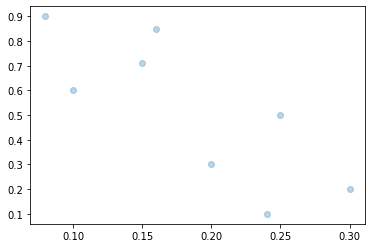

In [ ]:
## Data Points
plt.figure()
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.show()

Data points with two clusters centroids


> Indented block



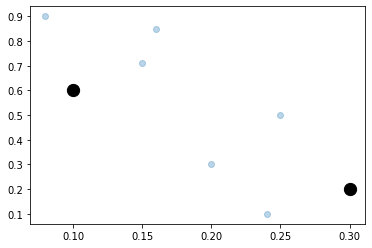

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(c_x,c_y, marker='o', c='black', s=150)



```
# This is formatted as code
```

Result after KMeans Clustering


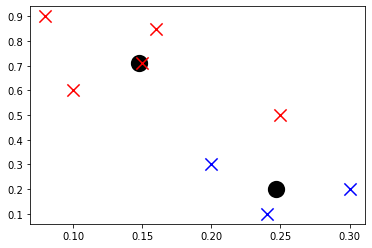

In [ ]:
colors = ['r','b']

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

In [ ]:
print("Point P6 belongs to cluster", model.predict([0.25,0.5]))


Point P6 belongs to cluster 0


In [ ]:
print("Population of cluster2 is", len(model.classifications[1]))


Population of cluster2 is 3


In [ ]:
print("Initial values of cluster centroids m1 and m2")
print("m1=",centroids[0])
print("m2=",centroids[1])

print("\nUpdated value of cluster centroids m1 and m2")
print("m1=",model.centroids[0])
print("m2=",model.centroids[1])

Initial values of cluster centroids m1 and m2
m1= [0.1 0.6]
m2= [0.3 0.2]

Updated value of cluster centroids m1 and m2
m1= [0.148 0.712]
m2= [0.24666667 0.2       ]
